In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Data/eda_using_basic_data_functions_in_python_dataset1.csv')

In [5]:
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [7]:
df.shape

(3401012, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


Convert the date column to datetime
info will provide the total number of rows (3,401,012) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory.

In this case, notice that the date column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function to_datetime().

In [11]:
df['date']= pd.to_datetime(df['date'])

Calculate the days with the most strikes


In [13]:
df.groupby(['date']).sum().sort_values('number_of_strikes',ascending=False)

C:\Users\mouni\AppData\Local\Temp\ipykernel_35968\1605670586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['date']).sum().sort_values('number_of_strikes',ascending=False)


,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
...,...
2018-01-31,130
2018-01-01,91
2018-01-06,57


In [14]:
df['month']=df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [15]:
#Calculate the number of strikes per month
df.groupby(['month']).sum().sort_values('number_of_strikes',ascending=False)

C:\Users\mouni\AppData\Local\Temp\ipykernel_35968\2218110642.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['month']).sum().sort_values('number_of_strikes',ascending=False)


,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


In [20]:
#Convert the month number to text : slice to take only 5 letters 
df['month_txt']=df['date'].dt.month_name().str.slice(stop=5)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Janua
1,2018-01-03,41,POINT(-78.4 29),1,Janua
2,2018-01-03,33,POINT(-73.9 27),1,Janua
3,2018-01-03,38,POINT(-73.8 27),1,Janua
4,2018-01-03,92,POINT(-79 28),1,Janua


In [22]:
df_by_month=df.groupby(['month','month_txt']).sum().sort_values('month',ascending=True).head(12).reset_index()
df_by_month

C:\Users\mouni\AppData\Local\Temp\ipykernel_35968\399024479.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_month=df.groupby(['month','month_txt']).sum().sort_values('month',ascending=True).head(12).reset_index()


,month,month_txt,number_of_strikes
0,1,Janua,860045
1,2,Febru,2071315
2,3,March,854168
3,4,April,1524339
4,5,May,4166726
5,6,June,6445083
6,7,July,8320400
7,8,Augus,15525255
8,9,Septe,3018336
9,10,Octob,1093962


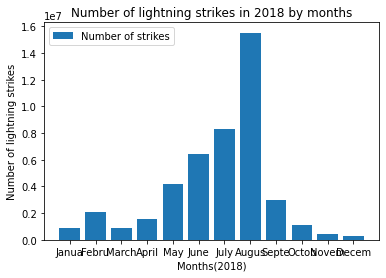

In [23]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()